<a href="https://colab.research.google.com/github/Dewanik/CNN_xrayclassifier_prototypev1/blob/master/xray_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A prototype for A.I X-ray classifier  that classifies wether a person is suffering from 'PNEUMONIA' or  not
![alt text](http://www.thetimes.co.uk/imageserver/image/methode%2Ftimes%2Fprod%2Fweb%2Fbin%2F33ad0ada-1e72-11e9-bcfa-eb6ef536f22f.jpg?crop=5121%2C2881%2C0%2C267)

In [1]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


Using TensorFlow backend.



**Parsing The Data From The Dataset spliting it to Train and Test Data**

Data Set Link : [Kaggle  Link](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)

In [3]:

x_train = []
y_train = []
x_test = []
y_test = []
i = 0
j = 0
k = 0
l = 0

def data_prase(img,label,types):
    rimg = cv2.resize(img,(400,400))
    if types == 'train':
        x_train.append(rimg)
        y_train.append(label)
    else:
        x_test.append(rimg)
        y_test.append(label)
for file in os.listdir('chest_xray/train/NORMAL/'):
            img = cv2.imread('chest_xray/train/NORMAL/'+file)
            if img is not None:
                data_prase(img,0,'train')
                i += 1
for file in os.listdir('chest_xray/train/PNEUMONIA/'):
        img = cv2.imread('chest_xray/train/PNEUMONIA/'+file)
        img_str = str(file)
        split_img = img_str.split('_')
        if img is not None:
            if split_img[1] == 'virus':
                data_prase(img,1,'train')
            else:
                data_prase(img,2,'train')
for file in os.listdir('chest_xray/test/NORMAL/'):
        img = cv2.imread('chest_xray/test/NORMAL/'+file)
        if img is not None:
            data_prase(img,0,'test')
for file in os.listdir('chest_xray/test/PNEUMONIA/'):
        img = cv2.imread('chest_xray/test/PNEUMONIA/'+file)
        img_str = str(file)
        split_img = img_str.split('_')
        if img is not None:
            if split_img[1] == 'virus':
                data_prase(img,1,'test')
            else:
                data_prase(img,2,'test')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train , y_train = shuffle(x_train,y_train)
x_test , y_test = shuffle(x_test,y_test)
x_train = x_train.reshape(5216,400,400,3)
x_test = x_test.reshape(624,400,400,3)


['person439', 'virus', '891.jpeg']
['person592', 'virus', '1141.jpeg']
['person1104', 'virus', '1826.jpeg']
['person303', 'bacteria', '1431.jpeg']
['person1481', 'bacteria', '3866.jpeg']
['person918', 'bacteria', '2843.jpeg']
['person1726', 'bacteria', '4552.jpeg']
['person1125', 'bacteria', '3066.jpeg']
['person19', 'bacteria', '59.jpeg']
['person702', 'virus', '1299.jpeg']
['person1447', 'bacteria', '3741.jpeg']
['person849', 'bacteria', '2770.jpeg']
['person341', 'virus', '699.jpeg']
['person1702', 'bacteria', '4511.jpeg']
['person1268', 'bacteria', '3227.jpeg']
['person442', 'virus', '904.jpeg']
['person1850', 'bacteria', '4721.jpeg']
['person256', 'bacteria', '1189.jpeg']
['person755', 'virus', '1380.jpeg']
['person351', 'bacteria', '1623.jpeg']
['person25', 'bacteria', '118.jpeg']
['person298', 'bacteria', '1413.jpeg']
['person257', 'bacteria', '1194.jpeg']
['person566', 'bacteria', '2351.jpeg']
['person1482', 'virus', '2573.jpeg']
['person1409', 'bacteria', '3583.jpeg']
['person

[0. 0. 1.]


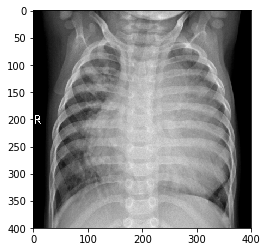

In [0]:

print(y_train[500])
plt.imshow(x_train[500])

In [4]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu',padding='same', input_shape=(400,400,3)))
model.add(Conv2D(16, kernel_size=3, activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='same'))
model.add(Conv2D(32, kernel_size=3, activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding='same'))
model.add(Conv2D(64, kernel_size=3, activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(96, kernel_size=3, activation='relu',padding='same'))
model.add(Conv2D(96, kernel_size=3, activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, activation='relu',padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3,activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 5216 samples, validate on 624 samples
Epoch 1/15
5216/5216 [==============================] - 49s 9ms/step - loss: 0.8561 - acc: 0.6070 - val_loss: 0.9128 - val_acc: 0.5881
Epoch 2/15
5216/5216 [==============================] - 41s 8ms/step - loss: 0.6316 - acc: 0.7124 - val_loss: 1.1576 - val_acc: 0.6250
Epoch 3/15
5216/5216 [==============================] - 42s 8ms/step - loss: 0.5531 - acc: 0.7598 - val_loss: 1.1516 - val_acc: 0.6074
Epoch 4/15
5216/5216 [==============================] - 41s 8ms/step - loss: 0.5367 - acc: 0.7571 - val_loss: 1.0730 - val_acc: 0.7179
Epoch 5/15
5216/5216 [==============================] - 41s 8ms/step - loss: 0.4916 - acc: 0.7836 - val_loss: 1.3713 - val_acc: 0.6827
Epoch 6/15
5216/5216 [==============================] - 41s 8ms/step - loss: 0.4480 - acc: 0.7928 - val_loss: 1.5071 - val_acc: 0.6715
Epoch 7/15
5216/5216 [==============================] - 41s 8ms/step - loss: 0.4438 - acc: 0.80

Prediction:
[[5.384653e-06 9.996113e-01 5.233987e-01]]
Bacterial Pneumonia
Actual Label:
[0. 1. 0.]
Bacterial Pneumonia


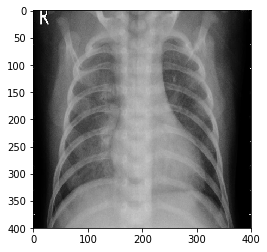

In [12]:
index_n = 81
predicted = model.predict(x_test[index_n:index_n+1])
print('Prediction:')
print(predicted)
pmax = np.argmax(predicted)
labels = y_test[index_n]

if pmax == 0:
    print('Normal')
elif pmax == 1:
    print('Bacterial Pneumonia')
else:
    print('Virus Penumonia')

lmax = np.argmax(labels)
print('Actual Label:')
print(labels)
if lmax == 0:
    print('Normal')
elif lmax == 1:
    print('Bacterial Pneumonia')
else:
    print('Virus Pneumonia')
plt.imshow(x_test[index_n])


